In [528]:
import scanpy as sc
import hotspot
import scipy
import numpy as np
import mplscience
import matplotlib
from numpy import array
from scipy.sparse import coo_matrix


In [529]:
adata = sc.read_csv("/home/PAK-CSPMZ/vakimov/mg_counts/sheep_counts.csv", first_column_names = True).T

In [530]:
adata

AnnData object with n_obs × n_vars = 321 × 24858

In [531]:
adata.obs["total_counts"] = np.asarray(adata.X.sum(1)).ravel()
adata.layers["counts"] = adata.X

In [532]:
adata.var_names_make_unique()
sc.pp.filter_cells(adata, min_genes=1)
sc.pp.filter_genes(adata, min_cells=1)

In [533]:
adata.obs["total_counts"] = np.asarray(adata.X.sum(1)).ravel()
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata.layers["log_normalized"] = adata.X.copy()
sc.pp.scale(adata)
sc.tl.pca(adata)

In [534]:
adata

AnnData object with n_obs × n_vars = 321 × 9025
    obs: 'total_counts', 'n_genes'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts', 'log_normalized'

In [535]:
hs = hotspot.Hotspot(
    adata,
    layer_key="counts",
    model='danb',
    latent_obsm_key="X_pca",
    umi_counts_obs_key="total_counts"
)

In [536]:
hs.create_knn_graph(
    weighted_graph=False, n_neighbors=300,
)

In [537]:
hs_results = hs.compute_autocorrelations()

hs_results.head(50)

100%|██████████| 9025/9025 [00:05<00:00, 1728.43it/s]


,C,Z,Pval,FDR
Gene,,,,
CYBB,0.008394,0.420514,0.337055,0.881993
SPATS2L,0.007460,0.406323,0.342253,0.881993
SPP1,0.008420,0.322774,0.373433,0.881993
ENSOART00000008110,0.005621,0.316834,0.375685,0.881993
XXYLT1,0.004890,0.311973,0.377530,0.881993
ANKRD23,0.008257,0.311587,0.377677,0.881993
SLC16A9,0.006850,0.282982,0.388595,0.881993
IDH1,0.006850,0.282982,0.388595,0.881993
ENSOART00000004257,0.006850,0.282982,0.388595,0.881993


In [538]:
hs_genes = hs_results.loc[hs_results.FDR < 0.05].index # Select genes

local_correlations = hs.compute_local_correlations(hs_genes) # jobs for parallelization

Computing pair-wise local correlation on 0 features...


0it [00:00, ?it/s]
0it [00:00, ?it/s]


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
No implementation of function Function(<built-in function getitem>) found for signature:
 
 >>> getitem(array(float64, 1d, C), Tuple(int64, Literal[int](0)))
 
There are 22 candidate implementations:
   - Of which 20 did not match due to:
   Overload of function 'getitem': File: <numerous>: Line N/A.
     With argument(s): '(array(float64, 1d, C), UniTuple(int64 x 2))':
    No match.
   - Of which 1 did not match due to:
   Overload in function 'GetItemBuffer.generic': File: numba/core/typing/arraydecl.py: Line 166.
     With argument(s): '(array(float64, 1d, C), UniTuple(int64 x 2))':
    Rejected as the implementation raised a specific error:
      NumbaTypeError: cannot index array(float64, 1d, C) with 2 indices: UniTuple(int64 x 2)
  raised from /usr/local/lib/python3.8/dist-packages/numba/core/typing/arraydecl.py:88
   - Of which 1 did not match due to:
   Overload in function 'GetItemBuffer.generic': File: numba/core/typing/arraydecl.py: Line 166.
     With argument(s): '(array(float64, 1d, C), Tuple(int64, Literal[int](0)))':
    Rejected as the implementation raised a specific error:
      NumbaTypeError: cannot index array(float64, 1d, C) with 2 indices: Tuple(int64, Literal[int](0))
  raised from /usr/local/lib/python3.8/dist-packages/numba/core/typing/arraydecl.py:88

During: typing of intrinsic-call at /home/PAK-CSPMZ/vakimov/.local/lib/python3.8/site-packages/hotspot/local_stats_pairs.py (842)

File ".local/lib/python3.8/site-packages/hotspot/local_stats_pairs.py", line 842:
def expand_pairs(pairs, vals, N):
    <source elided>

        x = pairs[i, 0]
        ^


In [ ]:
modules = hs.create_modules(
    min_gene_threshold=30, core_only=True, fdr_threshold=0.05
)

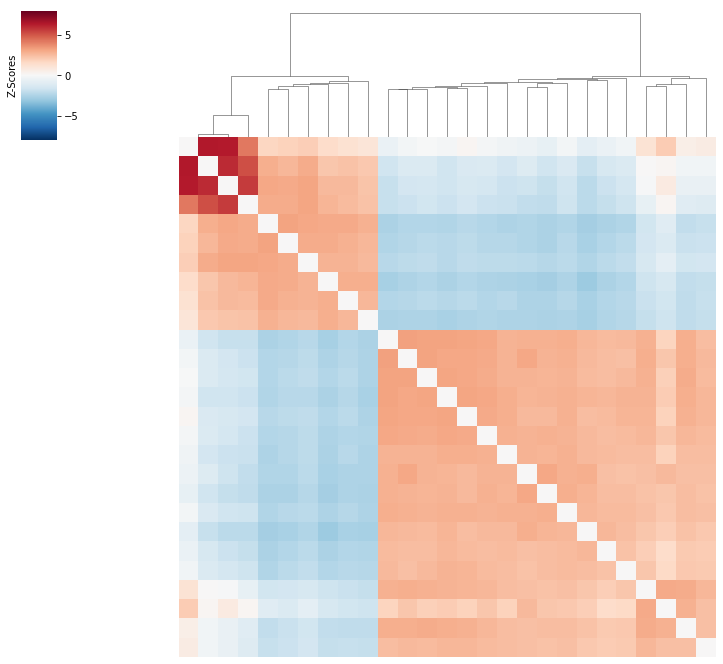

In [ ]:
hs.plot_local_correlations()

In [ ]:
# Show the top genes for a module

module = 1

results = hs.results.join(hs.modules)
results = results.loc[results.Module == module]
df = results.sort_values('Z', ascending=False)
df.head(10)


,C,Z,Pval,FDR,Module
Gene,,,,,


In [ ]:
df.to_csv('/home/PAK-CSPMZ/vakimov/hotspot_tables/sheep1.csv')

In [ ]:
module_scores = hs.calculate_module_scores()

module_scores.head()

Computing scores for 0 modules...


0it [00:00, ?it/s]


""
marmoset1.W881687
marmoset1.W881689
marmoset1.W881690
marmoset1.W881691
marmoset1.W881692


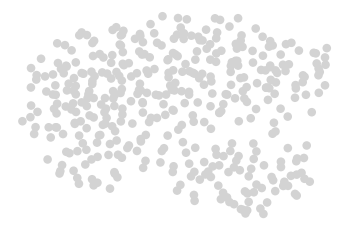

In [ ]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.pl.umap(adata, frameon=False)

In [ ]:
module_cols = []
for c in module_scores.columns:
    key = f"Module {c}"
    adata.obs[key] = module_scores[c]
    module_cols.append(key)

In [ ]:
with mplscience.style_context():
    sc.pl.umap(adata, color=module_cols, frameon=False, vmin=-1, vmax=1)

ValueError: Could not broadast together arguments with shapes: [0, 1].